In [1]:
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import networkx as nx
import random
from time import perf_counter_ns
from collections import deque

First 10 rows of adjacency matrix
0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

First 10 rows of adjacency list
0 95 13 31 73
1 93 90 37 25
2 48 53 10 23
3 12 13 74


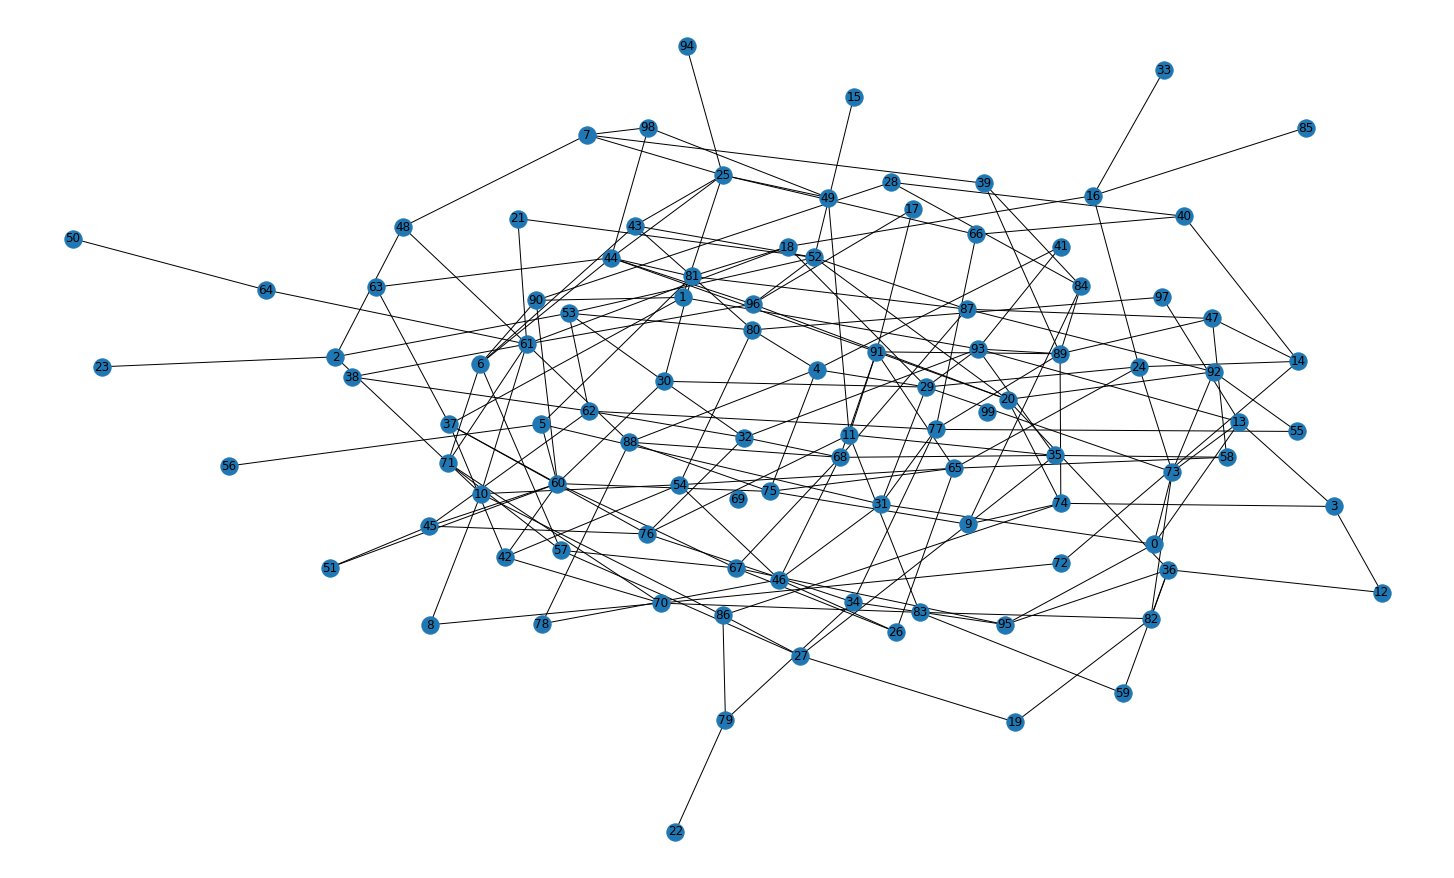

In [2]:
seed = 43
g = nx.Graph()
g.add_nodes_from(range(100))
random.seed(seed)
g.add_edges_from(random.choices([(x, y) for x in range(100) for y in range(x + 1, 100)], k=200))

print('First 10 rows of adjacency matrix')
for row in nx.adjacency_matrix(g).todense().A[:4]:
    print(*row)

print('\nFirst 10 rows of adjacency list')
for row in list(nx.generate_adjlist(g))[:4]:
    print(row)

plt.figure(figsize=(20, 12))
nx.draw_kamada_kawai(g, with_labels=True)

In [3]:
def find_connected_components_dfs(g):
    def dfs(node):
        if node in visited:
            return []
        visited.add(node)
        res = [node]
        for nnode in g.neighbors(node):
            res.extend(dfs(nnode))
        return res
    
    ret = []
    visited = set()
    for node in g.nodes:
        if (res := dfs(node)):
            ret.append(res)
    return ret

def find_shortest_path_bfs(g, n1, n2):
    if n1 == n2:
        return []
    queue = deque([[n1]])
    visited = set()
    while queue:
        path = queue.popleft()
        for nnode in g.neighbors(path[- 1]):
            if nnode not in visited:
                if nnode == n2:
                    return path + [nnode]
                visited.add(nnode)
                queue.append(path + [nnode])
    return - 1

In [4]:
print('Connected components: ', find_connected_components_dfs(g))
print('\nShortest path between vertices 0 and 74: ', find_shortest_path_bfs(g, 0, 74))

Connected components:  [[0, 95, 67, 26, 46, 31, 29, 73, 24, 65, 54, 10, 2, 48, 7, 98, 49, 11, 76, 45, 51, 60, 90, 28, 84, 89, 91, 20, 74, 86, 79, 22, 34, 77, 66, 40, 14, 47, 87, 52, 53, 80, 4, 88, 75, 9, 27, 19, 82, 83, 59, 36, 12, 3, 13, 93, 1, 37, 42, 70, 8, 72, 71, 61, 64, 50, 18, 16, 33, 85, 81, 44, 25, 94, 43, 6, 57, 96, 17, 63, 30, 32, 68, 35, 58, 62, 38, 5, 56, 21, 41, 97, 78, 15, 92, 55, 39, 23], [69], [99]]

Shortest path between vertices 0 and 74:  [0, 13, 3, 74]
